# Heart Diseases Analysis - My first Kaggle work

### Import everything important

In [29]:
# Common Packages
import pandas as pd
import numpy as np

# plot and visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import iplot

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Dataset

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

print("Number of rows in data : {}".format(df.shape[0]))
print("Number of columns in data :{}".format(df.shape[1]))

Number of rows in data : 303
Number of columns in data :14


> #### So, We have 302 samples and 14 features

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Basic Understanding of features
* age - Age in Years 
* sex - [ Male = 1, Female = 0]
* cp  - Chest pain type
  * typical angina = 0
  * atypical angina = 1
  * non-anginal pain = 2
  * asymptomatic = 3
* trestbps - Resting blood pressure (in mm Hg on admission to the hospital)
* chol     - Cholesterol measurement in mg/dl
* fbs      - Fasting blood sugar > 120 mg/dl
    * true  = 1
    * false = 0
* restecg -  Resting electrocardiographic measurement
    * Normal = 0
    * Having ST-T wave abnormality = 1
    * Definite left ventricular hypertrophy = 2
* thalach - Maximum heart rate achieved
* exang   - Exercise induced angina
    * Yes - 1
    * No  - 0
* oldpeak - ST depression induced by exercise relative to rest
* slope   - The slope of the peak exercise ST segment
* ca      -  Number of major vessels (0-3) colored by flourosopy
* thal    - A blood disorder called thalassemia
    * Normal = 3
    * Fixed Defect = 6
    * Reversable Defect = 7
* target 
    * Heart Disease Yes = 1
    * No = 0

## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### No null values which is very good. No need to clean a data 

In [11]:
# Statistical properties
df.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [12]:
# Change the names of the columns for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### this looks better!

### Correlation Plot

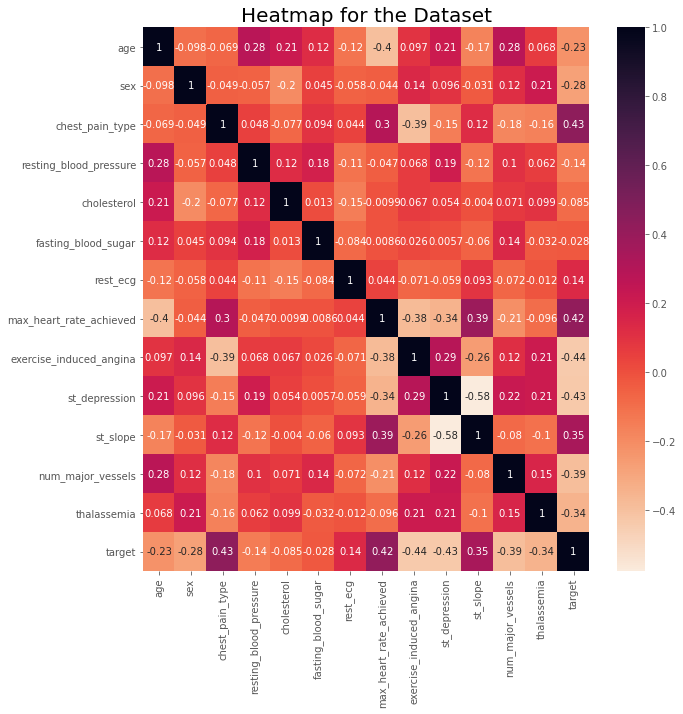

In [23]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

The Heat Maps shows that almost all features in the dataset are very less correlated with each other and this implies we must include all of the features.

In [25]:
print(f"Minimum Age : {min(df.age)} years")
print(f"Maximum Age : {max(df.age)} years")

Minimum Age : 29 years
Maximum Age : 77 years


In [30]:

hist_data = [df['age']]
group_labels = ['age'] 

colors = ['#835AF1']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels=group_labels, colors=colors,
                         bin_size=10, show_rug=False)

# Add title
fig.update_layout(width=700, title_text='Age Distribution')
fig.show()

Normal distribution!

## Feature Engineering

In [31]:
categorical_cols = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','st_slope','num_major_vessels','thalassemia']
numeric_cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']

In [32]:
multi_label_cols = [i for i in categorical_cols if df[i].nunique()>2]
multi_label_cols

['chest_pain_type', 'rest_ecg', 'st_slope', 'num_major_vessels', 'thalassemia']

In [33]:
# Lets normalize the numerical_cols
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df[numeric_cols] = std.fit_transform(df[numeric_cols])

In [34]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [35]:
# Catgorical Encoding
df = pd.get_dummies(data = df,columns = multi_label_cols)

In [36]:
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,chest_pain_type_0,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1,1,...,1,1,0,0,0,0,0,0,1,0


In [37]:
x = df.drop(['target'],axis=1) 
y = df['target']

### Cross Validation

In [51]:
from sklearn.model_selection import train_test_split

# Train = 70 % Test= 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [53]:
print("Shape of x_train : {}".format(x_train.shape))
print("Shape of x_test : {}".format(x_test.shape))
print("Shape of y_train :{}".format(y_train.shape))
print("Shape of y_test :{}".format(y_test.shape))

Shape of x_train : (212, 27)
Shape of x_test : (91, 27)
Shape of y_train :(212,)
Shape of y_test :(91,)


## Models

### Logistic regression

In [75]:
lr = LogisticRegression()

# Model fit
lr.fit(x_train, y_train)

y_pred_prob = lr.predict_proba(x_test)[:, 1]
y_pred = lr.predict(x_test)


# AUC Score
auc = roc_auc_score(y_test, y_pred_prob)

# evaluating the model
print("Training Accuracy :{}".format(lr.score(x_train, y_train)))
print("Testing Accuracy :{}".format(lr.score(x_test, y_test)))
print("AUC Score :{}".format(auc))

Training Accuracy :0.8915094339622641
Testing Accuracy :0.8461538461538461
AUC Score :0.9153771760154739


              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



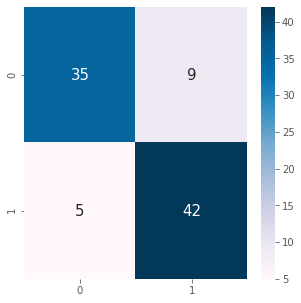

In [76]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [77]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.875
Specificity :  0.8235294117647058


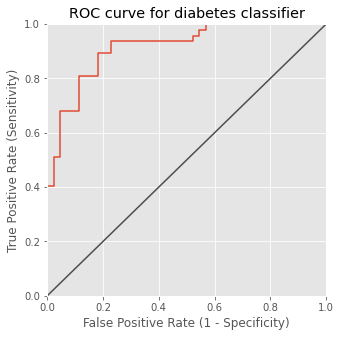

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Random Forest

In [81]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(x_train, y_train)
y_pred_prob = rf.predict_proba(x_test)[:, 1]
y_pred = rf.predict(x_test)

# AUC Score
auc = roc_auc_score(y_test, y_pred_prob)

# evaluating the model
print("Training Accuracy :{}".format(rf.score(x_train, y_train)))
print("Testing Accuracy :{}".format(rf.score(x_test, y_test)))
print("AUC Score :{}".format(auc))

Training Accuracy :0.9339622641509434
Testing Accuracy :0.8461538461538461
AUC Score :0.9226305609284333


              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



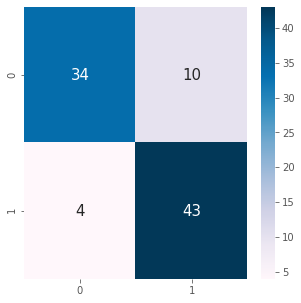

In [82]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [83]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8947368421052632
Specificity :  0.8113207547169812


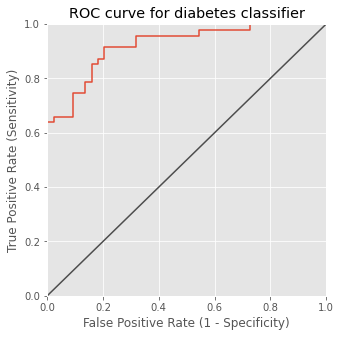

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Permutation importance

In [85]:
# Random forest model
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



Weight,Feature
0.0527 ± 0.0643,num_major_vessels_0
0.0374 ± 0.0357,chest_pain_type_0
0.0286 ± 0.0264,thalassemia_2
0.0242 ± 0.0563,st_depression
0.0176 ± 0.0108,sex
0.0154 ± 0.0176,st_slope_1
0.0132 ± 0.0256,thalassemia_3
0.0110 ± 0.0278,max_heart_rate_achieved
0.0110 ± 0.0368,exercise_induced_angina
0.0044 ± 0.0108,chest_pain_type_1


## Save and Verify

In [95]:
import pickle

# Save a model to  pickle file
Pkl_Filename = "Pickle_lr_Model.pkl"
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lr, file)

In [96]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression()

In [97]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(x_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(x_test)  

Ypredict

Test score: 84.62 %


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])